# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1.sepal length in cm(SL)
2.sepal width in cm(SW)
3.petal length in cm(PL)
4.petal width in cm(PW)
class:
-- Iris Setosa -- Iris Versicolour -- Iris Virginica

# Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_excel(r'C:\Users\hp\Downloads\iris.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#To display the top 5 rows
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#To get the shape of the dataset
df.shape

(150, 5)

In [5]:
#to get basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to display stats about data
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing the dataset

In [7]:
#check the presence of duplicate rows
duplicates=df[df.duplicated()]
print("duplicates rows:\n",duplicates)

duplicates rows:
       SL   SW   PL   PW  Classification
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [8]:
#to drop the duplicated rows
df=df.drop_duplicates()
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df['Classification']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 147, dtype: object

In [10]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

In [11]:
#ckeck no.of null values in the dataset
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Ther is no null values in PetalWidth and classification columns.

In [12]:
#to get the no.of null values in numerical columns
num_cols=df[['SL', 'SW', 'PL', 'PW']]
num_cols.isna().sum()

SL    7
SW    6
PL    6
PW    0
dtype: int64

**HANDLING NULL(MISSING) VALUES**

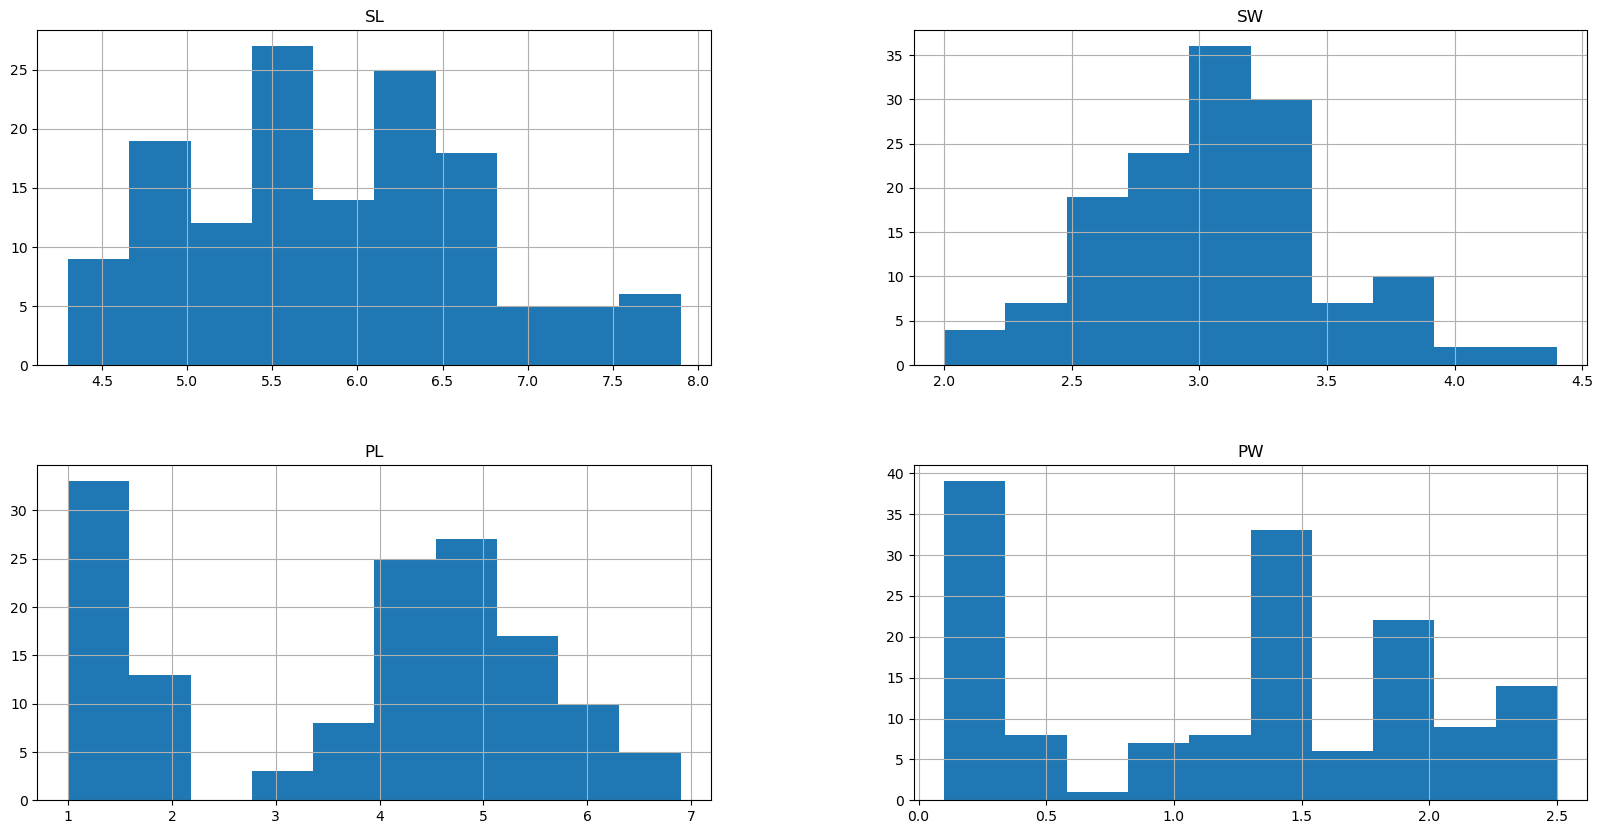

In [13]:
#Histograms
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show()

In [14]:
#by checking the distribution of data, replace the missing value with central tendency
df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].mean())
df['PL']=df['PL'].fillna(df['PL'].median())
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

The missing values are replaced by the mean and median values.

# Handling Outliers

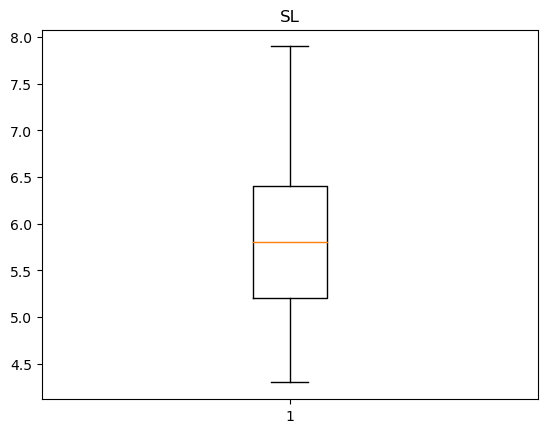

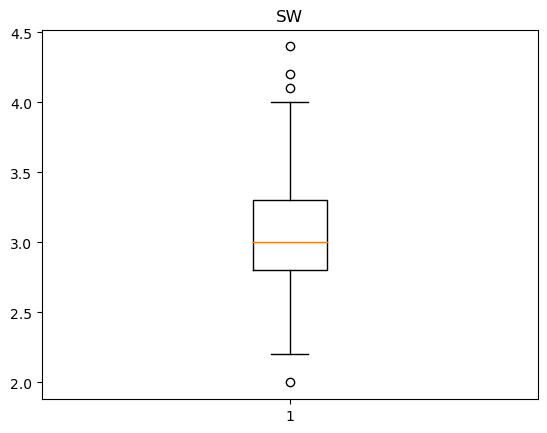

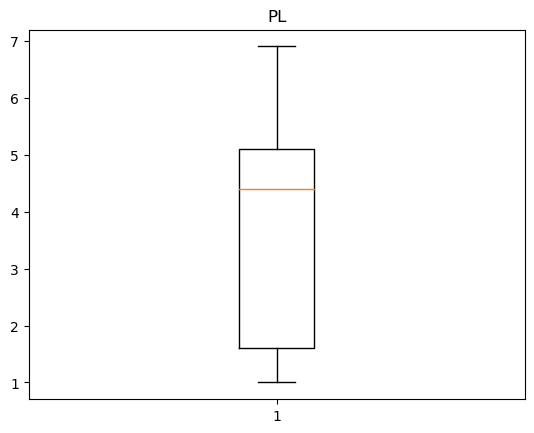

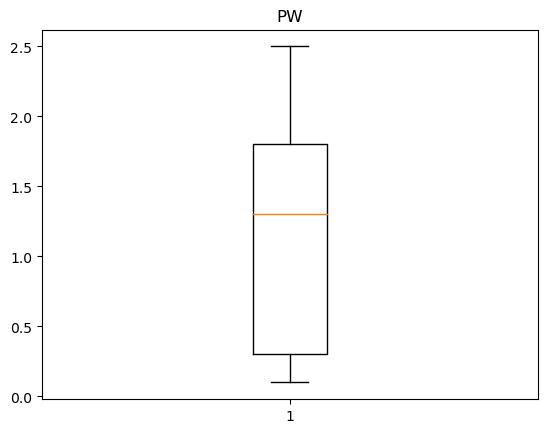

In [15]:
#Checking stats of outliers by plotting box plot
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [16]:
#removing outliers
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [17]:
df['SW'].median()

3.0

In [18]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [19]:
outliers=[]
for x in df['SW']:
    if ((x>up_lim) or (x<low_lim)):
        outliers.append(x)
outliers

[4.4, 4.1, 4.2, 2.0]

In [20]:
ind1=df['SW']<low_lim
df.loc[ind1].index

Int64Index([60], dtype='int64')

In [21]:
df.drop([60],inplace=True)

In [22]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [23]:
df.drop([15, 32, 33],inplace=True)

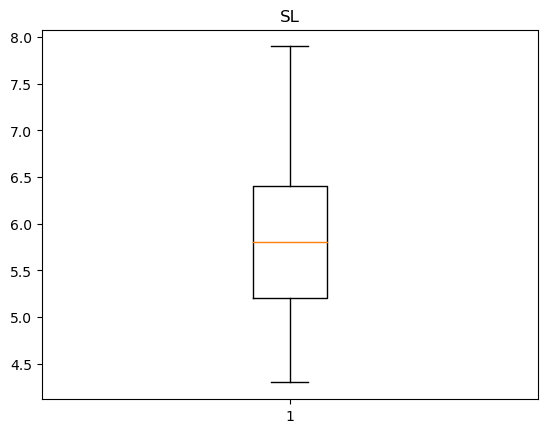

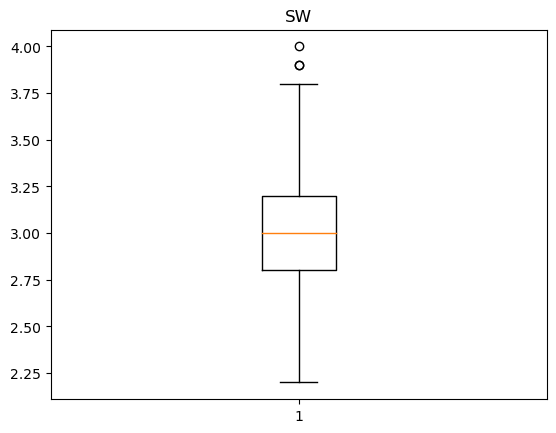

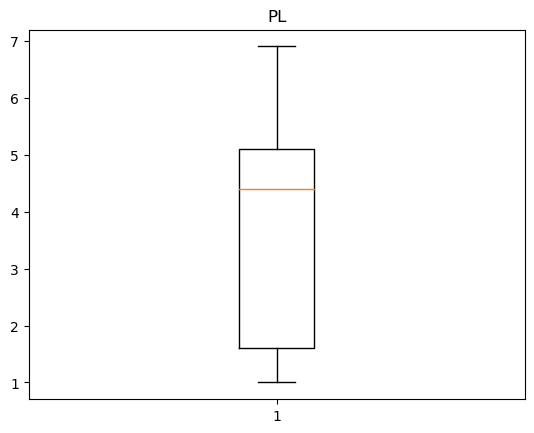

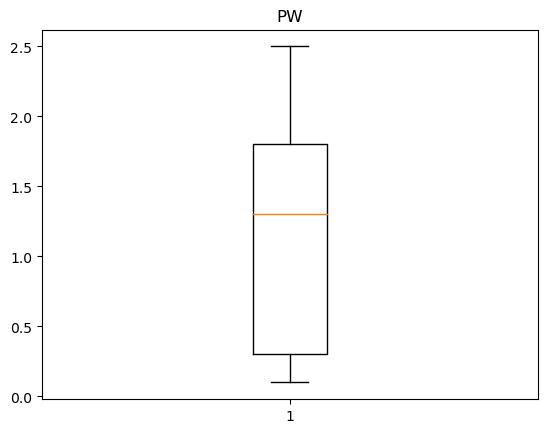

In [24]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [25]:
#Scatter Plot
colors = ['red', 'orange', 'blue']
classification= ['Iris-virginica','Iris-versicolor','Iris-setosa']

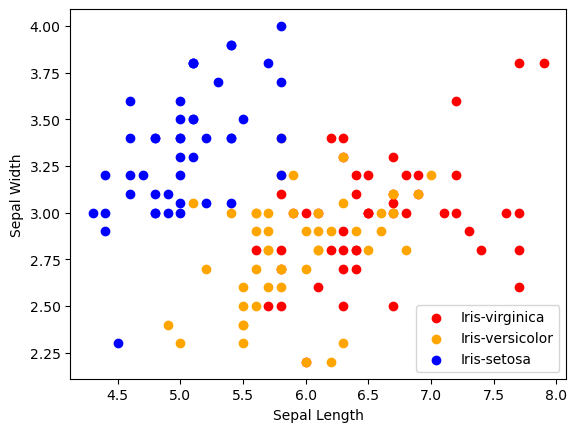

In [26]:
for i in range(3):
    x = df[df['Classification'] ==classification[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label=classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

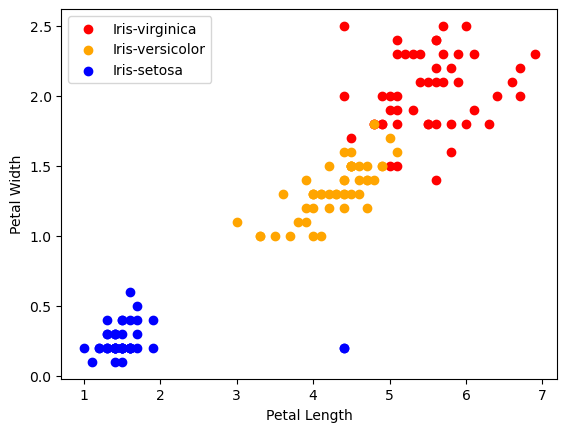

In [27]:
for i in range(3):
    x = df[df['Classification'] == classification[i]]
    plt.scatter(x['PL'], x['PW'], c = colors[i], label=classification[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

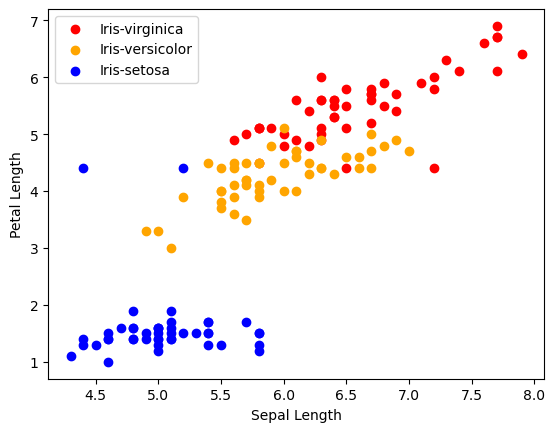

In [28]:
for i in range(3):
    x = df[df['Classification'] == classification[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

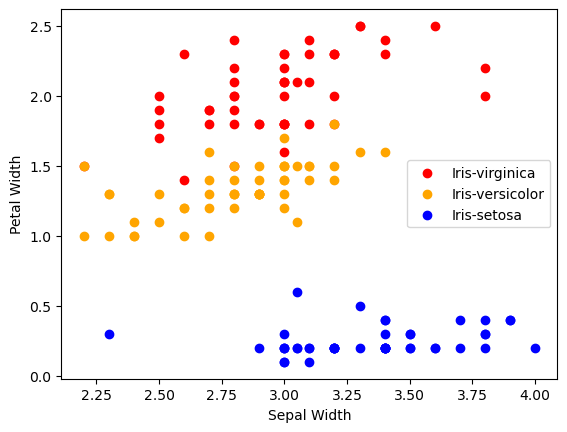

In [29]:
for i in range(3):
    x = df[df['Classification'] == classification[i]]
    plt.scatter(x['SW'], x['PW'], c = colors[i], label=classification[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation matrix

In [30]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102663,0.835513,0.803290
SW,-0.102663,1.000000,-0.379366,-0.308790
PL,0.835513,-0.379366,1.000000,0.931843
PW,0.803290,-0.308790,0.931843,1.000000


<AxesSubplot:>

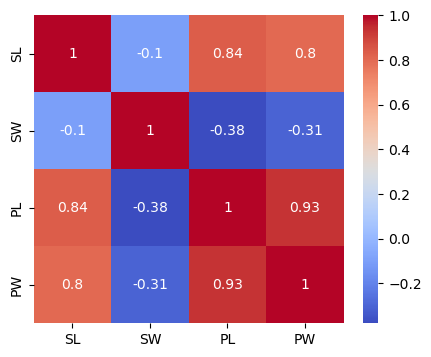

In [31]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, ax=ax, annot=True, cmap = 'coolwarm')

# Label Encoding

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [35]:
from sklearn.model_selection import train_test_split
# train - 80
# test - 20
X = df.drop(columns=['Classification'])
Y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=42, test_size=0.2)

In [36]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [38]:
model=clf.fit(x_train,y_train)
model

LogisticRegression()

In [39]:
y_pred_lr=model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_lr))
precision=precision_score(y_test,y_pred_lr,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred_lr,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred_lr,average='weighted')
print('F1 score=',f1)

Accuracy= 0.896551724137931
Precision= 0.8984674329501916
Recall= 0.896551724137931
F1 score= 0.8960782766511481


In [41]:
confusion_matrix(y_test,y_pred_lr)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  8]], dtype=int64)

**Knn- K Nearest Neighbours**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)


for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [43]:
metric_k

[0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.896551724137931]

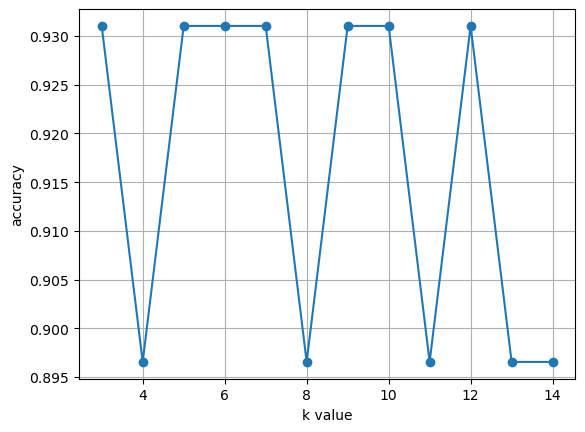

In [44]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred))
precision=precision_score(y_test,y_pred,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred,average='weighted')
print('F1 score=',f1)

Accuracy= 0.896551724137931
Precision= 0.8984674329501916
Recall= 0.896551724137931
F1 score= 0.8960782766511481


In [46]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  8]], dtype=int64)

**Support Vector Machine(SVM)**

In [47]:
#Linear
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred_svm=svmclf.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
precision=precision_score(y_test,y_pred_svm,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred_svm,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred_svm,average='weighted')
print('F1 score=',f1)

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall= 0.9310344827586207
F1 score= 0.9310344827586207


In [50]:
#rbf
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
precision=precision_score(y_test,y_pred_svm,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred_svm,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred_svm,average='weighted')
print('F1 score=',f1)

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall= 0.9310344827586207
F1 score= 0.9310344827586207


In [52]:
confusion_matrix(y_test,y_pred_svm)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

In [53]:
#poly
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
precision=precision_score(y_test,y_pred_svm,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred_svm,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred_svm,average='weighted')
print('F1 score=',f1)

Accuracy= 0.8275862068965517
Precision= 0.8814655172413793
Recall= 0.8275862068965517
F1 score= 0.8148148148148147


In [55]:
confusion_matrix(y_test,y_pred_svm)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  5,  5]], dtype=int64)

**Decision tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred_dt=dt_clf.predict(x_test)
y_pred_dt

array([2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 0, 0])

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_dt))
precision=precision_score(y_test,y_pred_dt,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred_dt,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred_dt,average='weighted')
print('F1 score=',f1)

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall= 0.9310344827586207
F1 score= 0.9310344827586207


In [59]:
confusion_matrix(y_test,y_pred_dt)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

**Random forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred_rf=rf_clf.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_rf))
precision=precision_score(y_test,y_pred_rf,average='weighted')
print('Precision=',precision)
recall=recall_score(y_test,y_pred_rf,average='weighted')
print('Recall=',recall)
f1=f1_score(y_test,y_pred_rf,average='weighted')
print('F1 score=',f1)

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall= 0.9310344827586207
F1 score= 0.9310344827586207


In [63]:
confusion_matrix(y_test,y_pred_rf)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

# Conclusion

Decision tree and random forest are the best models among all the above models.these two models give greater accuracy than others.